In [11]:
import cupy

ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

Original error:
  ImportError: DLL load failed while importing runtime: The specified module could not be found.
================================================================


100% |########################################################################|


phase:


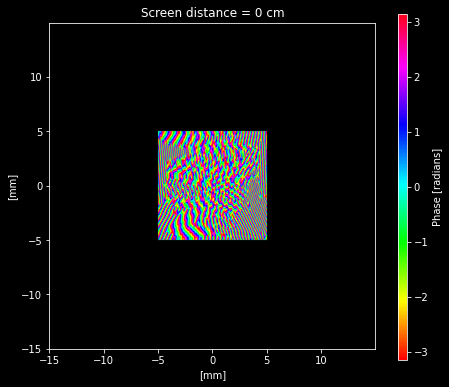

TypeError: Image data of dtype complex128 cannot be converted to float

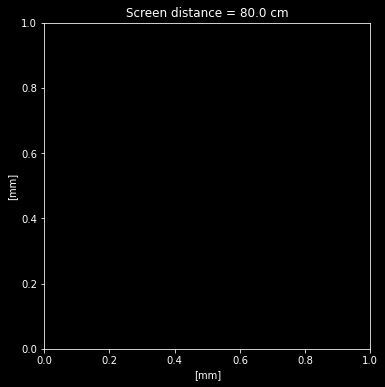

In [13]:
import diffractsim
# diffractsim.set_backend("CUDA") #Change the string to "CUDA" to use GPU acceleration

from diffractsim import MonochromaticField, ApertureFromImage, Lens, mm, nm, cm, FourierPhaseRetrieval


# Generate a Fourier plane phase hologram
PR = FourierPhaseRetrieval(target_amplitude_path = 'nip.jpg', new_size= (400,400), pad = (200,200))
PR.retrieve_phase_mask(max_iter = 200, method = 'Conjugate-Gradient')
PR.save_retrieved_phase_as_image('nip_hologram.jpg')


#Add a plane wave
F = MonochromaticField(
    wavelength=633 * nm, extent_x=30 * mm, extent_y=30 * mm, Nx=2400, Ny=2400, intensity = 0.005
)


# load the hologram as a phase mask aperture
F.add(ApertureFromImage(
     amplitude_mask_path= "white_background.png", 
     phase_mask_path= "nip_hologram.jpg", image_size=(10.0 * mm, 10.0 * mm), simulation = F))

# plot colors at z = 0
rgb = F.get_field()
print('phase:')
F.plot_phase(rgb)

# propagate field to Fourier plane
# F.add(Lens(f = 80*cm))
F.propagate(80*cm)


F.plot_intensity(rgb)

# plot colors (reconstructed image) at z = 80*cm (Fourier plane)
rgb = F.get_colors()
print('colors:')
F.plot_colors(rgb)